In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

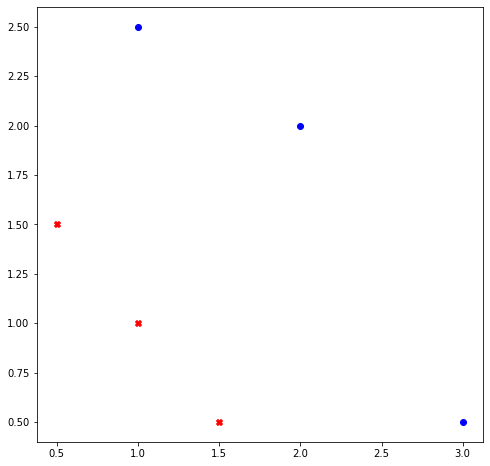

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

fig, ax = plt.subplots(1,1,figsize=(8,8))
for i in range(len(X_train)):
    if y_train[i] == 0:
        ax.scatter(X_train[i][0],X_train[i][1], color = "r", marker = "X")
    else:
        ax.scatter(X_train[i][0],X_train[i][1], color = "b", marker = "o")



In [35]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(X, y, w, b):
    m = X.shape[0]
    cost_ = 0

    for i in range(m):
        cost_ += y[i]*np.log( sigmoid ( np.dot(X[i,:],w) + b ) ) + (1-y[i]*np.log(1-sigmoid ( np.dot(X[i,:],w) +b) ))
    return -cost_/m

def computeGrediantLogistic(X,y,w,b):
    m,n = X.shape
    
    grad_w = np.zeros((n,))
    grad_b = 0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b) 
        for j in range(n):
            grad_w[j] += X[i,j] * (sigmoid(np.dot(w, X[i]) + b) - y[i])
        grad_b += sigmoid(np.dot(w, X[i]) + b) - y[i]
    return grad_w/m, grad_b/m

def compute_gradient_logistic(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_dw , dj_db

X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = computeGrediantLogistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [37]:
def grediantDescent(X, y, wInit, bInit, alpha, numIters):
    w = wInit
    b = bInit
    Jhistory = np.zeros((numIters,))
    Losshistory = np.zeros((numIters,))

    for i in range(numIters):
        w += - alpha * computeGrediantLogistic(X, y, w, b)[0]
        b += - alpha * computeGrediantLogistic(X, y, w, b)[1]
        Jhistory[i] =  cost(X,y,w,b)
    return w, b, Jhistory, Losshistory

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, Jhistory, Losshistory = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


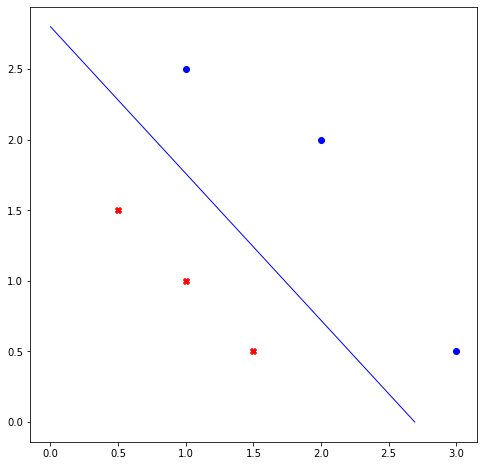

In [38]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
for i in range(len(X_train)):
    if y_train[i] == 0:
        ax.scatter(X_train[i][0],X_train[i][1], color = "r", marker = "X")
    else:
        ax.scatter(X_train[i][0],X_train[i][1], color = "b", marker = "o")

x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c="b", lw=1)
plt.show()